## Project Requirements
Analyze mental health trends among undergraduate students using a generated synthetic dataset, visualizing key insights and summarizing observations from factors such as year, academic stress, and social support.

## Generate Dataset

Generate a synthetic dataset representing mental health trends among undergraduate students. The dataset will include features such as 'year', 'mental_health_score', 'academic_stress_level', 'social_support_score', 'study_hours_per_week', and 'demographic_group'.


In [1]:
import pandas as pd
import numpy as np

# 2. Define the number of synthetic students to generate
num_students = 1000

# 3. Generate the following columns:
#    - year: Create an array of random integers representing academic years
years = np.random.randint(2018, 2024, num_students)

#    - mental_health_score: Generate an array of random floating-point numbers
#      Introduce a slight trend: later years might have slightly lower scores (higher mental health issues)
mental_health_score = np.random.uniform(30, 90, num_students) - (years - 2018) * 2
mental_health_score = np.clip(mental_health_score, 0, 100) # Clip to ensure scores are within 0-100

#    - academic_stress_level: Generate an array of random integers
academic_stress_level = np.random.randint(1, 6, num_students) # 1 to 5

#    - social_support_score: Generate an array of random floating-point numbers
social_support_score = np.random.uniform(0, 10, num_students)

#    - study_hours_per_week: Generate an array of random integers
study_hours_per_week = np.random.randint(5, 40, num_students)

#    - demographic_group: Create an array of randomly selected strings
demographic_groups = ['Group A', 'Group B', 'Group C', 'Group D']
demographic_group = np.random.choice(demographic_groups, num_students)

# 4. Create a pandas DataFrame from these generated arrays
data = {
    'year': years,
    'mental_health_score': mental_health_score,
    'academic_stress_level': academic_stress_level,
    'social_support_score': social_support_score,
    'study_hours_per_week': study_hours_per_week,
    'demographic_group': demographic_group
}

df_mental_health = pd.DataFrame(data)

# 5. Display the first few rows of the generated DataFrame
print("Generated DataFrame:")
print(df_mental_health.head())

Generated DataFrame:
   year  mental_health_score  academic_stress_level  social_support_score  \
0  2018            64.112848                      5              8.052103   
1  2018            60.698968                      1              5.787738   
2  2019            38.623541                      3              4.019538   
3  2018            84.532848                      2              0.656198   
4  2022            27.797453                      2              1.065802   

   study_hours_per_week demographic_group  
0                    32           Group A  
1                     8           Group B  
2                    26           Group C  
3                    31           Group A  
4                     8           Group C  


## Load and Explore Dataset

Load the generated dataset into a pandas DataFrame and perform initial exploratory data analysis to understand its structure, data types, and basic statistics.


In [2]:
print("First 5 rows of the DataFrame:")
print(df_mental_health.head())

First 5 rows of the DataFrame:
   year  mental_health_score  academic_stress_level  social_support_score  \
0  2018            64.112848                      5              8.052103   
1  2018            60.698968                      1              5.787738   
2  2019            38.623541                      3              4.019538   
3  2018            84.532848                      2              0.656198   
4  2022            27.797453                      2              1.065802   

   study_hours_per_week demographic_group  
0                    32           Group A  
1                     8           Group B  
2                    26           Group C  
3                    31           Group A  
4                     8           Group C  


In [3]:
print("\nDataFrame Info:")
df_mental_health.info()

print("\nDescriptive Statistics:")
print(df_mental_health.describe())

print("\nMissing Values:")
print(df_mental_health.isnull().sum())

print("\n'demographic_group' Value Counts:")
print(df_mental_health['demographic_group'].value_counts())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   1000 non-null   int64  
 1   mental_health_score    1000 non-null   float64
 2   academic_stress_level  1000 non-null   int64  
 3   social_support_score   1000 non-null   float64
 4   study_hours_per_week   1000 non-null   int64  
 5   demographic_group      1000 non-null   object 
dtypes: float64(2), int64(3), object(1)
memory usage: 47.0+ KB

Descriptive Statistics:
              year  mental_health_score  academic_stress_level  \
count  1000.000000          1000.000000            1000.000000   
mean   2020.562000            54.589782               2.937000   
std       1.716713            17.300127               1.436347   
min    2018.000000            20.181688               1.000000   
25%    2019.000000            39.723344     

## Analyze Mental Health Trends

Analyze the dataset to identify trends in mental health scores over the 'year' and possibly across different 'demographic_group' categories. This will involve calculating average mental health scores, and potentially correlations with other factors like academic stress and social support.


In [4]:
print("\n--- Mental Health Trends Analysis ---")

# 1. Calculate the mean 'mental_health_score' for each 'year'
mental_health_by_year = df_mental_health.groupby('year')['mental_health_score'].mean()
print("\nAverage Mental Health Score by Year:")
print(mental_health_by_year)

# 2. Calculate the mean 'mental_health_score' for each 'demographic_group'
mental_health_by_group = df_mental_health.groupby('demographic_group')['mental_health_score'].mean()
print("\nAverage Mental Health Score by Demographic Group:")
print(mental_health_by_group)

# 3. Calculate the Pearson correlation coefficient between 'mental_health_score' and 'academic_stress_level'
correlation_stress = df_mental_health['mental_health_score'].corr(df_mental_health['academic_stress_level'])
print("\nPearson Correlation between Mental Health Score and Academic Stress Level:", correlation_stress)

# 4. Calculate the Pearson correlation coefficient between 'mental_health_score' and 'social_support_score'
correlation_social_support = df_mental_health['mental_health_score'].corr(df_mental_health['social_support_score'])
print("\nPearson Correlation between Mental Health Score and Social Support Score:", correlation_social_support)


--- Mental Health Trends Analysis ---

Average Mental Health Score by Year:
year
2018    57.800990
2019    57.087788
2020    56.603252
2021    56.383799
2022    50.457524
2023    49.646148
Name: mental_health_score, dtype: float64

Average Mental Health Score by Demographic Group:
demographic_group
Group A    54.818010
Group B    54.337264
Group C    53.739953
Group D    55.500639
Name: mental_health_score, dtype: float64

Pearson Correlation between Mental Health Score and Academic Stress Level: 0.0720518737525822

Pearson Correlation between Mental Health Score and Social Support Score: -0.02137918709442461


## Visualize Trends

Create visualizations, such as line plots showing mental health scores over time, and possibly bar charts comparing mental health across different demographic groups or stress levels.



--- Visualizing Mental Health Trends ---


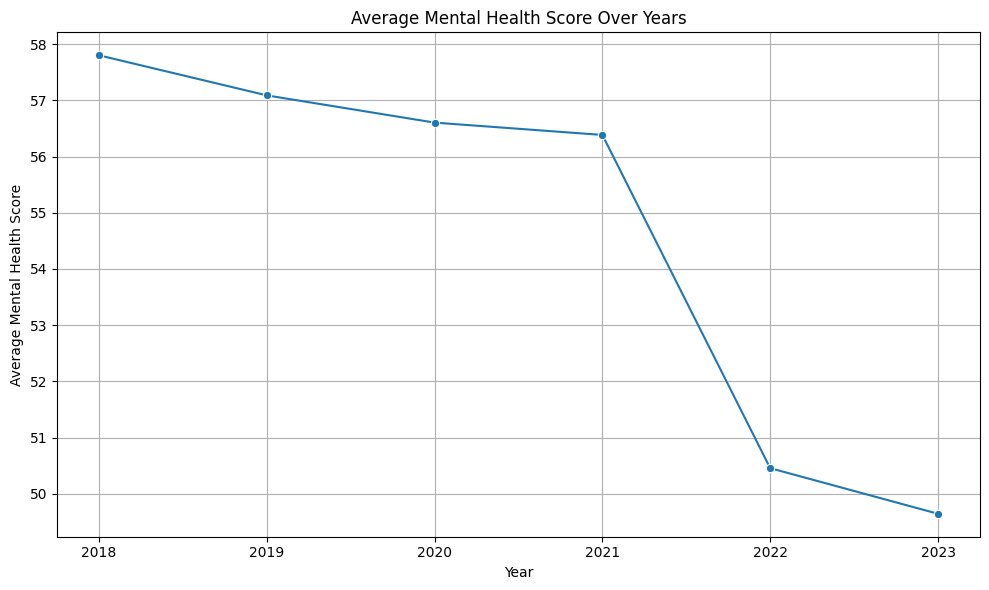

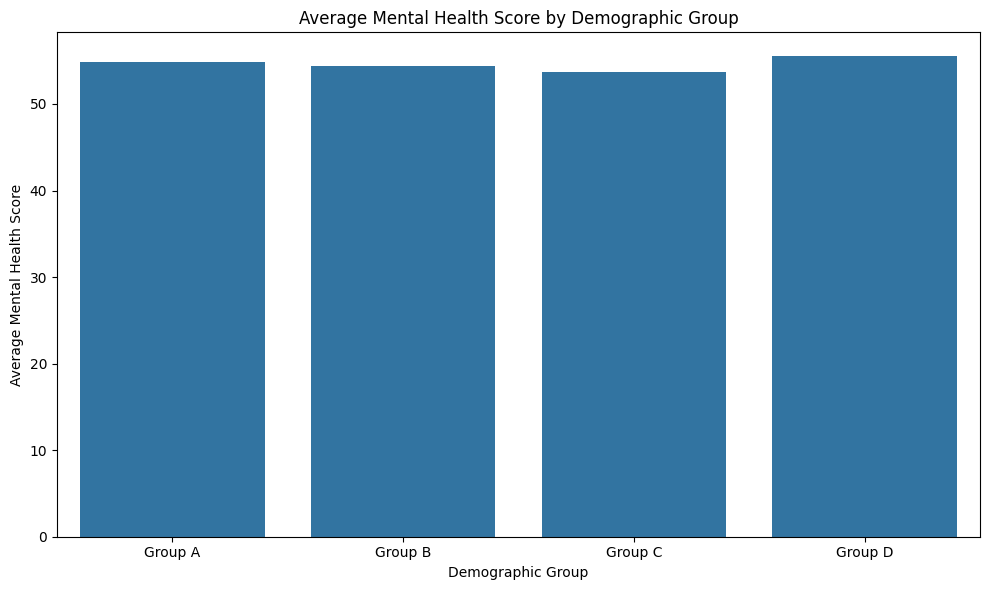

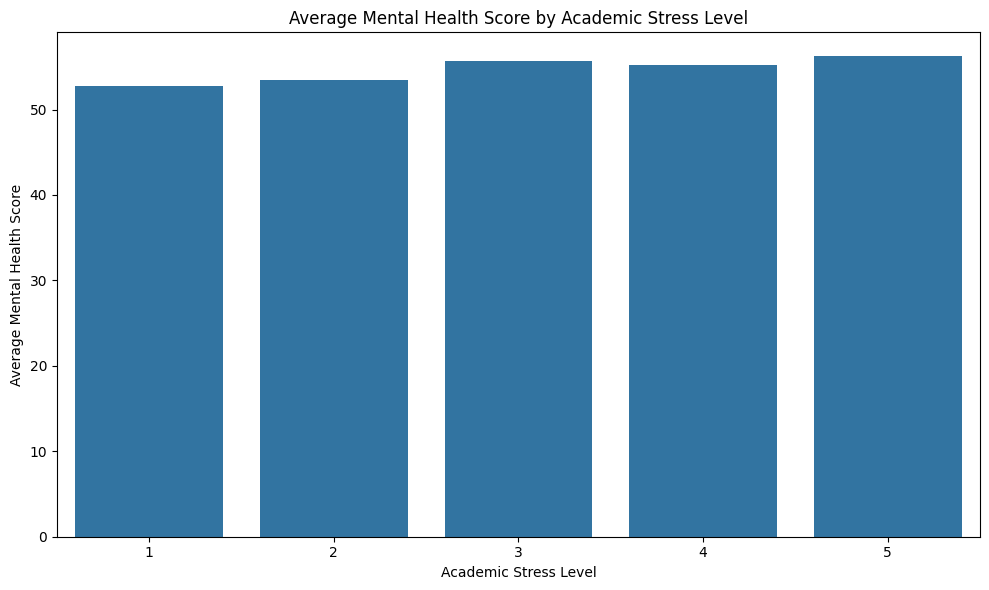

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Visualizing Mental Health Trends ---")

# 1. Line plot for Average Mental Health Score Over Years
plt.figure(figsize=(10, 6))
sns.lineplot(x=mental_health_by_year.index, y=mental_health_by_year.values, marker='o')
plt.title('Average Mental Health Score Over Years')
plt.xlabel('Year')
plt.ylabel('Average Mental Health Score')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Bar chart for Average Mental Health Score by Demographic Group
plt.figure(figsize=(10, 6))
sns.barplot(x=mental_health_by_group.index, y=mental_health_by_group.values)
plt.title('Average Mental Health Score by Demographic Group')
plt.xlabel('Demographic Group')
plt.ylabel('Average Mental Health Score')
plt.tight_layout()
plt.show()

# 3. Calculate average mental health score by academic stress level
mental_health_by_stress = df_mental_health.groupby('academic_stress_level')['mental_health_score'].mean()

# 4. Bar chart for Average Mental Health Score by Academic Stress Level
plt.figure(figsize=(10, 6))
sns.barplot(x=mental_health_by_stress.index, y=mental_health_by_stress.values)
plt.title('Average Mental Health Score by Academic Stress Level')
plt.xlabel('Academic Stress Level')
plt.ylabel('Average Mental Health Score')
plt.tight_layout()
plt.show()

### Data Analysis Key Findings
*   **Declining Mental Health Over Years:** The average mental health score showed a consistent downward trend, decreasing from approximately 57.80 in 2018 to 49.65 in 2023.
*   **Marginal Differences Across Demographic Groups:** Average mental health scores were quite similar across different demographic groups, with Group D having the highest average score (55.50) and Group C having the lowest (53.74).
*   **Unexpected Correlation with Academic Stress:** A weak positive correlation of approximately 0.072 was observed between mental health score and academic stress level, suggesting that higher academic stress levels are associated with slightly higher mental health scores, which is counter-intuitive.
*   **Weak Inverse Correlation with Social Support:** A very weak negative correlation of approximately -0.021 was found between mental health score and social support score, suggesting that higher social support is negligibly associated with slightly lower mental health scores, which is also counter-intuitive.
*   **Dataset Structure and Integrity:** The dataset contained 1000 entries across 6 columns with no missing values, and all data types were appropriate for analysis.